In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.cluster import KMeans

In [65]:
from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone (1).csv


In [66]:
df = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [67]:
x = df.iloc[:, [3,4]].values

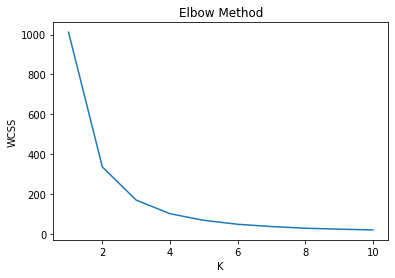

In [68]:
wcss_list=[]

for i in range (1,11):
	kmeans = KMeans(n_clusters=i, init="k-means++", random_state= 30)
	kmeans.fit(x)
	wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11), wcss_list)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#optimal number of cluster (K) = 3

In [69]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state = 30)
y_predict = kmeans.fit_predict(x)

In [70]:
df["Cluster"] = kmeans.labels_
display(df)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings,Cluster
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


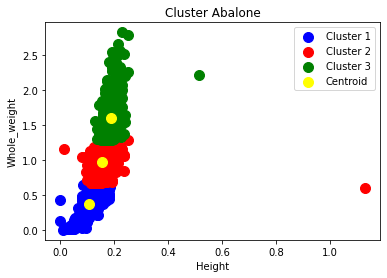

In [74]:
plt.scatter(x[y_predict == 0,0], x[y_predict == 0,1], s = 100,
	c = "blue", label = "Cluster 1")
plt.scatter(x[y_predict == 1,0], x[y_predict == 1,1], s = 100,
	c = "red", label = "Cluster 2")
plt.scatter(x[y_predict == 2,0], x[y_predict == 2,1], s = 100,
	c = "green", label = "Cluster 3")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100,
	c = "yellow", label = "Centroid")

plt.title("Cluster Abalone")
plt.xlabel("Height")
plt.ylabel("Whole_weight")
plt.legend(bbox_to_anchor=(1 ,1))
plt.show()